In [13]:
import pandas as pd
import numpy as np
%matplotlib inline

In [14]:
df=pd.read_csv('June 2018 - Historic Frequency Data.csv',parse_dates=['dtm'])
df=df.set_index('dtm')

In [15]:
df.head()

,f
dtm,
2018-06-01 00:00:00,50.142
2018-06-01 00:00:01,50.140
2018-06-01 00:00:02,50.135
2018-06-01 00:00:03,50.130
2018-06-01 00:00:04,50.122


In [16]:
#Defining curves to follow, for each frequency ppint we associate the corresponding level out output
frequency_dev     = [-0.5,-0.4,-.3,-0.2,-0.1,-0.015,-0.0135,0,0.0135,0.015,0.1,0.2,0.3,0.4,0.5]
frequency         = [x+50 for x in frequency_dev]

Linear_Response   = [-100,-80,-60,-40,-20,-3,0,0,0 ,3,20,40,60, 80, 100]
Response_MW       = [i * -0.01  for i in Linear_Response]

In [17]:
#new output calculation based on grid frequency and repsonse table
def FFR_response(f,MW,f_list):
          
    if f<f_list[0]:
        output=MW[0]
    else:
        output=MW[-1]

    for idx in range(0,len(f_list)-1):

    #use corrdinates and linear interpolation between them 
        if f_list[idx+1] >  f >=   f_list[idx]:
            output= (f-f_list[idx])/(f_list[idx+1]-f_list[idx])*(MW[idx+1]-MW[idx])+MW[idx]                    
            break
        
        
    return output 

FFR linear response curve


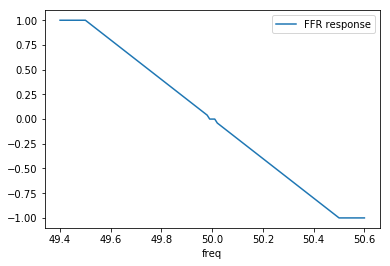

In [18]:

# Plot frequency/battery MW  curve
from functools import partial
f_plot = pd.DataFrame(np.arange(49.4,50.6,0.01), columns=['freq'])
f_plot['FFR response']  = f_plot['freq'].apply(FFR_response,args=(Response_MW ,frequency))

f_plot.plot(x='freq')

print('FFR linear response curve')

In [19]:
#Appying the FFR response curve to the frequency
df['MW']=df['f'].apply(FFR_response,args=(Response_MW,frequency))

In [20]:
nb_day=len(df)/(24*60*60)
Troughput_Discharged= df[df['MW']>0]['MW'].sum()/(60*60) #defined as the cumulative discharge through the system
nb_cycle_per_day=Troughput_Discharged/nb_day

In [21]:
print ('nb of cycles per day :',np.round(nb_cycle_per_day,2))

nb of cycles per day : 1.26
